![Cartoon of telecom customers](IMG_8811.png)


The telecommunications (telecom) sector in India is rapidly changing, with more and more telecom businesses being created and many customers deciding to switch between providers. "Churn" refers to the process where customers or subscribers stop using a company's services or products. Understanding the factors that influence keeping a customer as a client in predicting churn is crucial for telecom companies to enhance their service quality and customer satisfaction. As the data scientist on this project, you aim to explore the intricate dynamics of customer behavior and demographics in the Indian telecom sector in predicting customer churn, utilizing two comprehensive datasets from four major telecom partners: Airtel, Reliance Jio, Vodafone, and BSNL:

- `telecom_demographics.csv` contains information related to Indian customer demographics:

| Variable             | Description                                      |
|----------------------|--------------------------------------------------|
| `customer_id `         | Unique identifier for each customer.             |
| `telecom_partner `     | The telecom partner associated with the customer.|
| `gender `              | The gender of the customer.                      |
| `age `                 | The age of the customer.                         |
| `state`                | The Indian state in which the customer is located.|
| `city`                 | The city in which the customer is located.       |
| `pincode`              | The pincode of the customer's location.          |
| `registration_event` | When the customer registered with the telecom partner.|
| `num_dependents`      | The number of dependents (e.g., children) the customer has.|
| `estimated_salary`     | The customer's estimated salary.                 |

- `telecom_usage` contains information about the usage patterns of Indian customers:

| Variable   | Description                                                  |
|------------|--------------------------------------------------------------|
| `customer_id` | Unique identifier for each customer.                         |
| `calls_made` | The number of calls made by the customer.                    |
| `sms_sent`   | The number of SMS messages sent by the customer.             |
| `data_used`  | The amount of data used by the customer.                     |
| `churn`    | Binary variable indicating whether the customer has churned or not (1 = churned, 0 = not churned).|


In [73]:
# Importing libraries and methods/functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

## Data Validation

In [27]:
telecom_demo = pd.read_csv('telecom_demographics.csv')
print(telecom_demo.head())

   customer_id telecom_partner gender  age             state       city  \
0        15169          Airtel      F   26  Himachal Pradesh      Delhi   
1       149207          Airtel      F   74       Uttarakhand  Hyderabad   
2       148119          Airtel      F   54         Jharkhand    Chennai   
3       187288    Reliance Jio      M   29             Bihar  Hyderabad   
4        14016        Vodafone      M   45          Nagaland  Bangalore   

   pincode registration_event  num_dependents  estimated_salary  
0   667173         2020-03-16               4             85979  
1   313997         2022-01-16               0             69445  
2   549925         2022-01-11               2             75949  
3   230636         2022-07-26               3             34272  
4   188036         2020-03-11               4             34157  


In [3]:
telecom_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         6500 non-null   int64 
 1   telecom_partner     6500 non-null   object
 2   gender              6500 non-null   object
 3   age                 6500 non-null   int64 
 4   state               6500 non-null   object
 5   city                6500 non-null   object
 6   pincode             6500 non-null   int64 
 7   registration_event  6500 non-null   object
 8   num_dependents      6500 non-null   int64 
 9   estimated_salary    6500 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 507.9+ KB


In [4]:
telecom_usage = pd.read_csv('telecom_usage.csv')
print(telecom_usage.head())

   customer_id  calls_made  sms_sent  data_used  churn
0        15169          75        21       4532      1
1       149207          35        38        723      1
2       148119          70        47       4688      1
3       187288          95        32      10241      1
4        14016          66        23       5246      1


In [5]:
telecom_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   customer_id  6500 non-null   int64
 1   calls_made   6500 non-null   int64
 2   sms_sent     6500 non-null   int64
 3   data_used    6500 non-null   int64
 4   churn        6500 non-null   int64
dtypes: int64(5)
memory usage: 254.0 KB


In [7]:
churn_df = pd.merge(telecom_demo, telecom_usage, on='customer_id')
print(churn_df.head())

   customer_id telecom_partner gender  age             state       city  \
0        15169          Airtel      F   26  Himachal Pradesh      Delhi   
1       149207          Airtel      F   74       Uttarakhand  Hyderabad   
2       148119          Airtel      F   54         Jharkhand    Chennai   
3       187288    Reliance Jio      M   29             Bihar  Hyderabad   
4        14016        Vodafone      M   45          Nagaland  Bangalore   

   pincode registration_event  num_dependents  estimated_salary  calls_made  \
0   667173         2020-03-16               4             85979          75   
1   313997         2022-01-16               0             69445          35   
2   549925         2022-01-11               2             75949          70   
3   230636         2022-07-26               3             34272          95   
4   188036         2020-03-11               4             34157          66   

   sms_sent  data_used  churn  
0        21       4532      1  
1        3

## Exploratory Data Analysis (EDA)

### 1. Data Quality Assessment

In [48]:
# Check for missing values and duplicate rows
print("Missing values in each column:")
print(churn_df.isnull().sum())
print("\nDataset shape:", churn_df.shape)
print("\nDuplicate rows:", churn_df.duplicated().sum())

Missing values in each column:
customer_id           0
telecom_partner       0
gender                0
age                   0
state                 0
city                  0
pincode               0
registration_event    0
num_dependents        0
estimated_salary      0
calls_made            0
sms_sent              0
data_used             0
churn                 0
age_group             0
salary_bracket        0
dtype: int64

Dataset shape: (6500, 16)

Duplicate rows: 0


In [49]:
# Check data types and convert registration_event to datetime
churn_df['registration_event'] = pd.to_datetime(churn_df['registration_event'])
print("Data types after conversion:")
print(churn_df.dtypes)
print("\nRegistration date range:")
print(f"From: {churn_df['registration_event'].min()}")
print(f"To: {churn_df['registration_event'].max()}")

Data types after conversion:
customer_id                    int64
telecom_partner               object
gender                        object
age                            int64
state                         object
city                          object
pincode                        int64
registration_event    datetime64[ns]
num_dependents                 int64
estimated_salary               int64
calls_made                     int64
sms_sent                       int64
data_used                      int64
churn                          int64
age_group                     object
salary_bracket                object
dtype: object

Registration date range:
From: 2020-01-01 00:00:00
To: 2023-05-03 00:00:00


In [50]:
# Overall churn rate
total_customers = len(churn_df)
churned_customers = churn_df['churn'].sum()
churn_rate = (churned_customers / total_customers) * 100

In [51]:
print(f"Total customers: {total_customers:,}")
print(f"Churned customers: {churned_customers:,}")
print(f"Churn rate: {churn_rate:.2f}%")
print(f"\nChurn distribution:")
print(churn_df['churn'].value_counts())

Total customers: 6,500
Churned customers: 1,303
Churn rate: 20.05%

Churn distribution:
churn
0    5197
1    1303
Name: count, dtype: int64


In [52]:
# Create function to create age groups
def create_age_groups(age):
    if age < 25:
        return 'Young (18-24)'
    elif age < 35:
        return 'Young Adult (25-34)'
    elif age < 50:
        return 'Adult (35-49)'
    elif age < 65:
        return 'Senior (50-64)'
    else:
        return 'Elderly (65+)'

In [53]:
churn_df['age_group'] = churn_df['age'].apply(create_age_groups)

In [54]:
# Create salary brackets
def create_salary_brackets(salary):
    if salary < 40000:
        return 'Low (<40K)'
    elif salary < 70000:
        return 'Medium (40K-70K)'
    elif salary < 100000:
        return 'High (70K-100K)'
    else:
        return 'Very High (>100K)'


In [55]:
churn_df['salary_bracket'] = churn_df['estimated_salary'].apply(create_salary_brackets)

In [56]:
print("New features created:")
print(churn_df[ 'salary_bracket'].value_counts())
print(churn_df['age_group'].value_counts())

New features created:
salary_bracket
Very High (>100K)    2506
High (70K-100K)      1520
Medium (40K-70K)     1520
Low (<40K)            954
Name: count, dtype: int64
age_group
Senior (50-64)         1726
Adult (35-49)          1712
Elderly (65+)          1146
Young Adult (25-34)    1144
Young (18-24)           772
Name: count, dtype: int64


In [57]:
# Analyze churn by different Categories
# By telecom partner
print("Churn rate by telecom partner:")
partner_churn = churn_df.groupby('telecom_partner')['churn'].agg(['count', 'sum', 'mean']).round(3)
partner_churn.columns = ['Total_Customers', 'Churned_Customers', 'Churn_Rate']
print(partner_churn)

Churn rate by telecom partner:
                 Total_Customers  Churned_Customers  Churn_Rate
telecom_partner                                                
Airtel                      1598                324       0.203
BSNL                        1635                319       0.195
Reliance Jio                1658                319       0.192
Vodafone                    1609                341       0.212


In [58]:
# By gender
print("\nChurn rate by gender:")
gender_churn = churn_df.groupby('gender')['churn'].agg(['count', 'sum', 'mean']).round(3)
gender_churn.columns = ['Total_Customers', 'Churned_Customers', 'Churn_Rate']
print(gender_churn)



Churn rate by gender:
        Total_Customers  Churned_Customers  Churn_Rate
gender                                                
F                  2591                538       0.208
M                  3909                765       0.196


In [59]:
# By age group
print("\nChurn rate by age group:")
age_churn = churn_df.groupby('age_group')['churn'].agg(['count', 'sum', 'mean']).round(3)
age_churn.columns = ['Total_Customers', 'Churned_Customers', 'Churn_Rate']
print(age_churn)


Churn rate by age group:
                     Total_Customers  Churned_Customers  Churn_Rate
age_group                                                          
Adult (35-49)                   1712                367       0.214
Elderly (65+)                   1146                239       0.209
Senior (50-64)                  1726                358       0.207
Young (18-24)                    772                137       0.177
Young Adult (25-34)             1144                202       0.177


Statistical Analysis & Visualisation

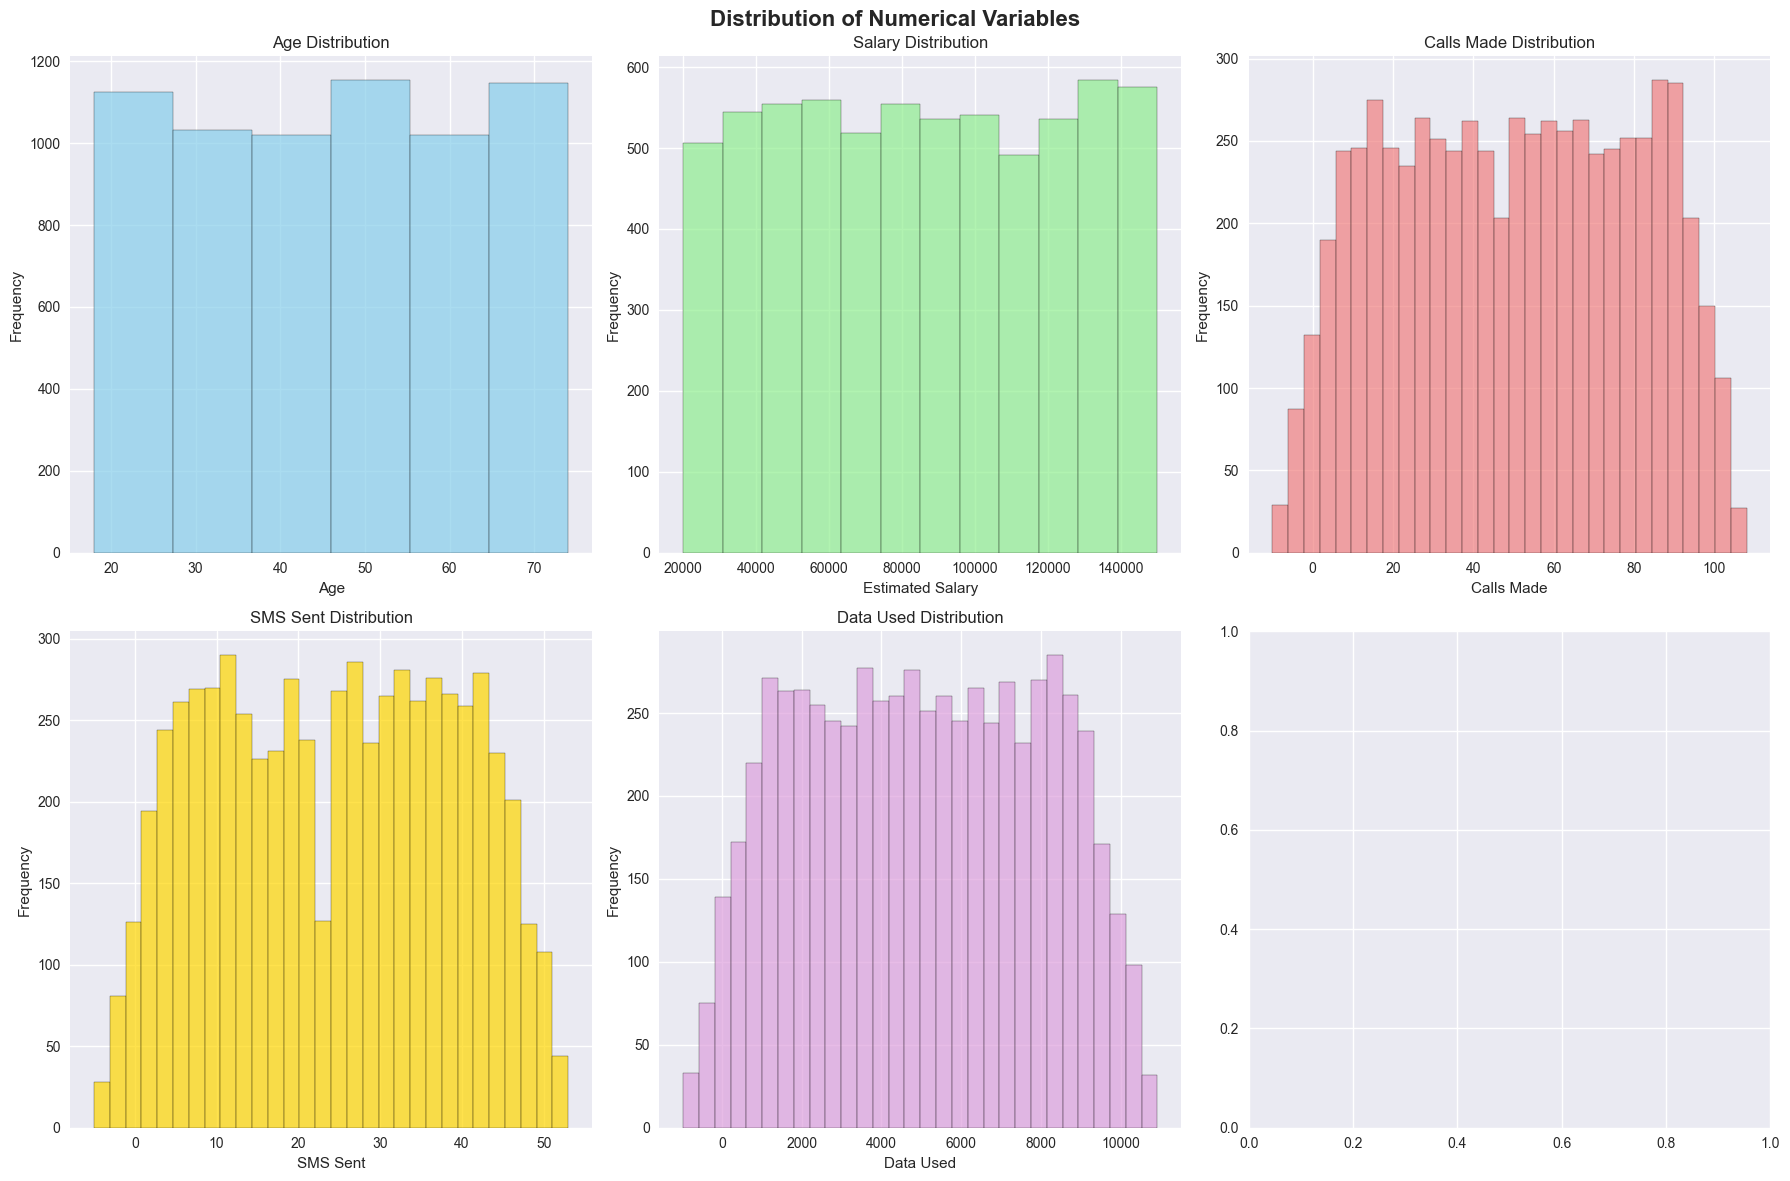

In [60]:
# Distribution analysis of numerical variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribution of Numerical Variables', fontsize=16, fontweight='bold')

# Age distribution
axes[0,0].hist(churn_df['age'], bins=6, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')

# Salary distribution
axes[0,1].hist(churn_df['estimated_salary'], bins=12, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Salary Distribution')
axes[0,1].set_xlabel('Estimated Salary')
axes[0,1].set_ylabel('Frequency')

# Calls made distribution
axes[0,2].hist(churn_df['calls_made'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0,2].set_title('Calls Made Distribution')
axes[0,2].set_xlabel('Calls Made')
axes[0,2].set_ylabel('Frequency')

# SMS sent distribution
axes[1,0].hist(churn_df['sms_sent'], bins=30, alpha=0.7, color='gold', edgecolor='black')
axes[1,0].set_title('SMS Sent Distribution')
axes[1,0].set_xlabel('SMS Sent')
axes[1,0].set_ylabel('Frequency')

# Data used distribution
axes[1,1].hist(churn_df['data_used'], bins=30, alpha=0.7, color='plum', edgecolor='black')
axes[1,1].set_title('Data Used Distribution')
axes[1,1].set_xlabel('Data Used')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

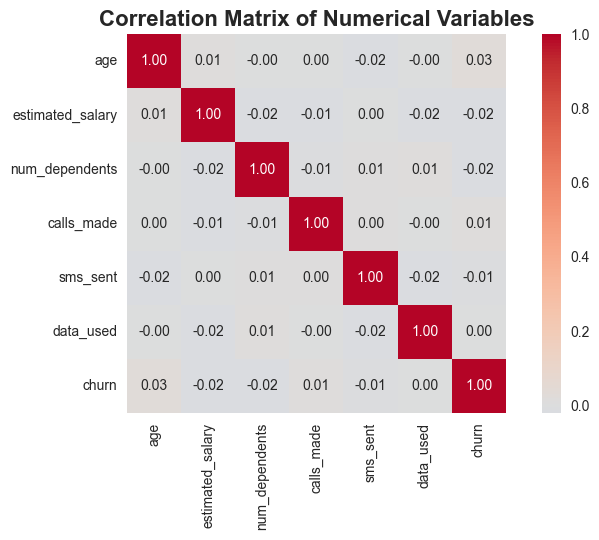


Top correlations with churn:
churn               1.000000
age                 0.027730
calls_made          0.014331
data_used           0.002141
sms_sent           -0.007423
num_dependents     -0.016128
estimated_salary   -0.019915
Name: churn, dtype: float64


In [61]:
# Correlation analysis
numerical_cols = ['age', 'estimated_salary', 'num_dependents', 'calls_made', 'sms_sent', 'data_used','churn']
correlation_matrix = churn_df[numerical_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Show top correlations with churn
churn_correlations = correlation_matrix['churn'].sort_values(ascending=False)
print("\nTop correlations with churn:")
print(churn_correlations)

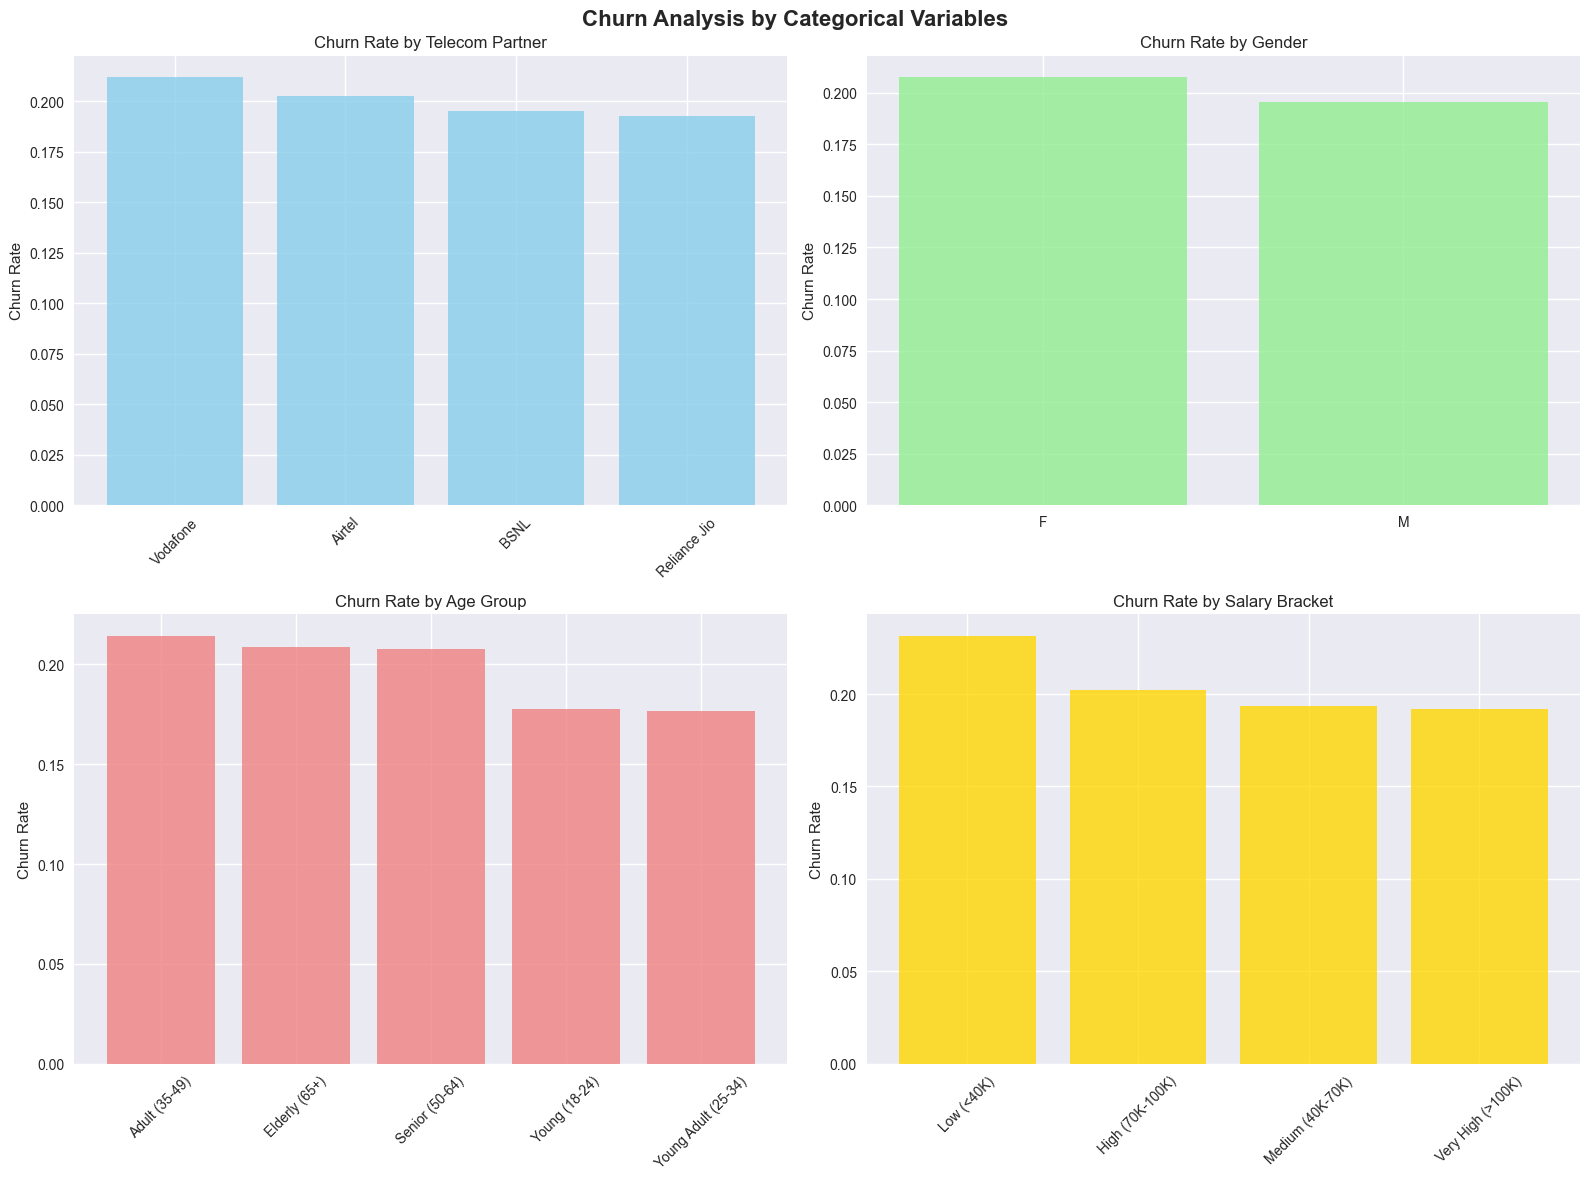

In [62]:
# Churn analysis by categorical variables
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Churn Analysis by Categorical Variables', fontsize=16, fontweight='bold')

# Telecom partner churn
partner_churn_plot = churn_df.groupby('telecom_partner')['churn'].mean().sort_values(ascending=False)
axes[0,0].bar(partner_churn_plot.index, partner_churn_plot.values, color='skyblue', alpha=0.8)
axes[0,0].set_title('Churn Rate by Telecom Partner')
axes[0,0].set_ylabel('Churn Rate')
axes[0,0].tick_params(axis='x', rotation=45)

# Gender churn
gender_churn_plot = churn_df.groupby('gender')['churn'].mean()
axes[0,1].bar(gender_churn_plot.index, gender_churn_plot.values, color='lightgreen', alpha=0.8)
axes[0,1].set_title('Churn Rate by Gender')
axes[0,1].set_ylabel('Churn Rate')

# Age group churn
age_churn_plot = churn_df.groupby('age_group')['churn'].mean().sort_values(ascending=False)
axes[1,0].bar(range(len(age_churn_plot)), age_churn_plot.values, color='lightcoral', alpha=0.8)
axes[1,0].set_title('Churn Rate by Age Group')
axes[1,0].set_ylabel('Churn Rate')
axes[1,0].set_xticks(range(len(age_churn_plot)))
axes[1,0].set_xticklabels(age_churn_plot.index, rotation=45)

# Salary bracket churn
salary_churn_plot = churn_df.groupby('salary_bracket')['churn'].mean().sort_values(ascending=False)
axes[1,1].bar(range(len(salary_churn_plot)), salary_churn_plot.values, color='gold', alpha=0.8)
axes[1,1].set_title('Churn Rate by Salary Bracket')
axes[1,1].set_ylabel('Churn Rate')
axes[1,1].set_xticks(range(len(salary_churn_plot)))
axes[1,1].set_xticklabels(salary_churn_plot.index, rotation=45)

plt.tight_layout()
plt.show()

Data Preprocessing

In [65]:
# Select features for modeling
feature_columns = [
    'telecom_partner', 'gender', 'age', 'state', 'city', 'num_dependents', 
    'estimated_salary', 'calls_made', 'sms_sent', 'data_used',
]

X = churn_df[feature_columns]
y = churn_df['churn']

print(f"Feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")
print(f"\nFeature columns: {list(X.columns)}")
print(f"\nTarget distribution:")
print(y.value_counts(normalize=True))

Feature matrix shape: (6500, 10)
Target variable shape: (6500,)

Feature columns: ['telecom_partner', 'gender', 'age', 'state', 'city', 'num_dependents', 'estimated_salary', 'calls_made', 'sms_sent', 'data_used']

Target distribution:
churn
0    0.799538
1    0.200462
Name: proportion, dtype: float64


In [66]:
# Identify categorical and numerical features based on data types
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical features: {categorical_features}")
print(f"Numerical features: {numerical_features}")

Categorical features: ['telecom_partner', 'gender', 'state', 'city']
Numerical features: ['age', 'num_dependents', 'estimated_salary', 'calls_made', 'sms_sent', 'data_used']


In [69]:
# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ],
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2002, stratify=y
)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"\nTraining set churn rate: {y_train.mean():.3f}")
print(f"Test set churn rate: {y_test.mean():.3f}")


Training set shape: (5200, 10)
Test set shape: (1300, 10)

Training set churn rate: 0.200
Test set churn rate: 0.201


In [71]:
# Apply preprocessing (fit on training data only)
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Apply SMOTE on the transformed training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_transformed, y_train)

print(f"\nTraining set shape: {X_train_balanced.shape}")
print(f"Test set shape: {X_test_transformed.shape}")
print(f"\nTraining set churn rate: {y_train_balanced.mean():.3f}")
print(f"Test set churn rate: {y_test.mean():.3f}")



Training set shape: (8316, 42)
Test set shape: (1300, 42)

Training set churn rate: 0.500
Test set churn rate: 0.201


Model Development

In [75]:
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print results
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix:")
    print(cm)
    
    return {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }


In [76]:
# Create pipelines for different models
models = {
    'Logistic Regression': ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', LogisticRegression(random_state=42, max_iter=1000))
    ]),
    
    'Random Forest': ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
    ])
}


In [77]:
# Evaluate baseline models
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test, name)


Logistic Regression Results:
Accuracy: 0.5215
Precision: 0.1805
Recall: 0.3908
F1-Score: 0.2470

Confusion Matrix:
[[576 463]
 [159 102]]

Random Forest Results:
Accuracy: 0.7892
Precision: 0.2174
Recall: 0.0192
F1-Score: 0.0352

Confusion Matrix:
[[1021   18]
 [ 256    5]]
